In [31]:
#
# Generate dataset by spliting board with random transform
#

In [14]:
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as VT
import random

In [22]:
def show(x, ax=plt):
    if isinstance(x, np.ndarray):
        x = Image.fromarray(x)
    assert isinstance(x, Image.Image)
    x = x.convert('RGB')
    ax.imshow(x)
    
def crop_square(x, i, j, h, w):
    return x.reshape(h, 32, w, 32).transpose([0, 2, 1, 3])[i, j]    

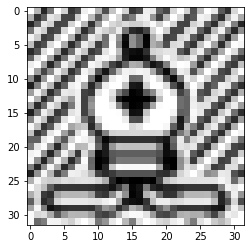

In [6]:

pieces = ['wP', 'wN', 'wB', 'wR', 'wQ', 'wK', 'bP', 'bN', 'bB', 'bR', 'bQ', 'bK']
fronts = [(f"data/piece/reasses/{x}.png", x) for x in pieces] + [('data/empty/ex000.png', 'empty')]
backs = ['data/background/ex044.png', 'data/background/ex300.png']

fronts = [(Image.open(x).convert('RGBA'), y) for (x, y) in fronts]
backs = [Image.open(x).convert('RGBA') for x in backs]

show(Image.alpha_composite(backs[1], fronts[2][0]))

In [2]:
def yield_random(src):
    while True:
        yield random.choice(src)

In [7]:
def compose(gen_fronts, backs):
    labels = np.empty([4, 4], dtype=object)
    rows = []
    for i in range(4):
        cells = []
        for j in range(4):
            x, y = next(gen_fronts)
            z = backs[(i + j) % 2]
            w = Image.alpha_composite(z, x)
            labels[i][j] = y
            cells.append(np.array(w))
        rows.append(np.concatenate(cells, axis=1))
    result = np.concatenate(rows, axis=0)
    return result, labels

array([['wQ', 'bQ', 'wR', 'wP'],
       ['bK', 'empty', 'wQ', 'wP'],
       ['bR', 'bQ', 'empty', 'bR'],
       ['wB', 'bR', 'bK', 'wR']], dtype=object)

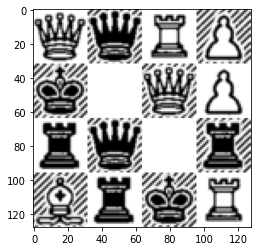

In [19]:
result, labels = compose(yield_random(fronts), backs)
show(result)
labels

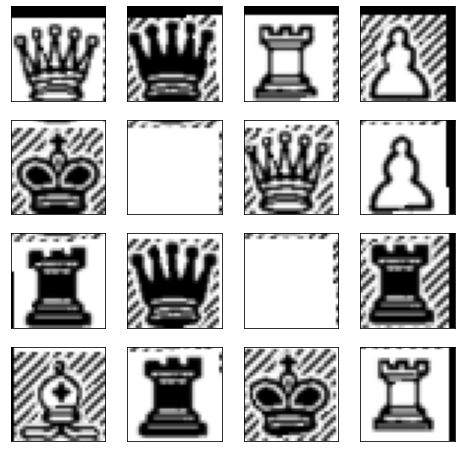

In [34]:
transform = VT.RandomAffine(2, [0.05, 0.05], [0.95, 1.05])

fig, axes = plt.subplots(4, 4, figsize=(8, 8))

x = Image.fromarray(result).convert('L')
x = transform(x)
x = np.array(x)

for i in range(4):
    for j in range(4):
        ax = axes[i][j]
        ax.set(xticks=[], yticks=[])
        show(crop_square(x, i, j, 4, 4), ax=ax)

In [28]:
out_dir = 'data/train'
gen_fronts = yield_random(fronts)
transform = VT.RandomAffine(2, [0.02, 0.02], [0.95, 1.05])

def generate(num_samples):
    cnt = 0
    for _ in range(num_samples):
        x, labels = compose(gen_fronts, backs)
        x = Image.fromarray(x).convert('L')
        x = transform(x)
        x = np.array(x)
        for i in range(4):
            for j in range(4):
                y = crop_square(x, i, j, h=4, w=4)
                z = labels[i][j]
                cnt += 1
                path = f"{out_dir}/{z}--generate--ex{cnt:04d}.png"
                Image.fromarray(y).convert('RGB').save(path)

In [30]:
generate(100)